### Importing Libaries

In [2]:
%matplotlib inline

## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
## for deep learning
import minisom
## for math
import math
from numpy import linalg as LA

### Reading Data

In [3]:
dtypes={'TRIP ID': np.int32, 'BIKE ID': np.int32 , 'TRIP DURATION': np.int32,
        'FROM STATION ID': np.int16, 'TO STATION ID': np.int16, }
orginal_df = pd.read_csv('bike_sharing_data.csv', dtype=dtypes)

In [4]:
orginal_df.head(3)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,14503132,06/12/2017 05:24:00 PM,06/12/2017 05:30:00 PM,1365,332,240,Sheridan Rd & Irving Park Rd,245,Clarendon Ave & Junior Ter,Subscriber,Male,1987.0,41.954245,-87.654406,POINT (-87.654406 41.954245),41.961004,-87.649603,POINT (-87.649603 41.961004)
1,14503133,06/12/2017 05:24:00 PM,06/12/2017 05:54:00 PM,4128,1787,51,Clark St & Randolph St,116,Western Ave & Winnebago Ave,Subscriber,Male,1972.0,41.884576,-87.631890,POINT (-87.63189 41.884576),41.915520,-87.687022,POINT (-87.687022 41.91552)
2,14503134,06/12/2017 05:24:00 PM,06/12/2017 05:42:00 PM,1885,1049,331,Halsted St & Blackhawk St (*),192,Canal St & Adams St,Subscriber,Male,1991.0,41.908537,-87.648627,POINT (-87.648627 41.908537),41.879255,-87.639904,POINT (-87.639904 41.879255)


In [5]:
df = orginal_df.drop(['GENDER', 'BIRTH YEAR', 'USER TYPE', 'FROM STATION NAME', 'TO STATION NAME',
                      'FROM LOCATION', 'TO LOCATION'], axis=1).dropna()

In [6]:
df.head(3)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,TO STATION ID,FROM LATITUDE,FROM LONGITUDE,TO LATITUDE,TO LONGITUDE
0,14503132,06/12/2017 05:24:00 PM,06/12/2017 05:30:00 PM,1365,332,240,245,41.954245,-87.654406,41.961004,-87.649603
1,14503133,06/12/2017 05:24:00 PM,06/12/2017 05:54:00 PM,4128,1787,51,116,41.884576,-87.631890,41.915520,-87.687022
2,14503134,06/12/2017 05:24:00 PM,06/12/2017 05:42:00 PM,1885,1049,331,192,41.908537,-87.648627,41.879255,-87.639904


In [7]:
df['START TIME'] = pd.to_datetime(df['START TIME'])
df['STOP TIME'] = pd.to_datetime(df['STOP TIME'])

In [12]:
orginal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRIP ID            int32  
 1   START TIME         object 
 2   STOP TIME          object 
 3   BIKE ID            int32  
 4   TRIP DURATION      int32  
 5   FROM STATION ID    int16  
 6   FROM STATION NAME  object 
 7   TO STATION ID      int16  
 8   TO STATION NAME    object 
 9   USER TYPE          object 
 10  GENDER             object 
 11  BIRTH YEAR         float64
 12  FROM LATITUDE      float64
 13  FROM LONGITUDE     float64
 14  FROM LOCATION      object 
 15  TO LATITUDE        float64
 16  TO LONGITUDE       float64
 17  TO LOCATION        object 
dtypes: float64(5), int16(2), int32(3), object(8)
memory usage: 1.1+ GB


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999133 entries, 0 to 9999999
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRIP ID          int32  
 1   START TIME       object 
 2   STOP TIME        object 
 3   BIKE ID          int32  
 4   TRIP DURATION    int32  
 5   FROM STATION ID  int16  
 6   TO STATION ID    int16  
 7   FROM LATITUDE    float64
 8   FROM LONGITUDE   float64
 9   TO LATITUDE      float64
 10  TO LONGITUDE     float64
dtypes: float64(4), int16(2), int32(3), object(2)
memory usage: 686.6+ MB


In [292]:
df.isnull().sum()

TRIP ID            0
START TIME         0
STOP TIME          0
BIKE ID            0
TRIP DURATION      0
FROM STATION ID    0
TO STATION ID      0
FROM LATITUDE      0
FROM LONGITUDE     0
TO LATITUDE        0
TO LONGITUDE       0
dtype: int64

# Question 1

In [164]:
print("number of unique bikes in this dataset", df['BIKE ID'].nunique())

number of unique bikes in this dataset 6385


# Question 2

In [66]:
Bike_data = df.groupby('BIKE ID')['TRIP ID'].count().reset_index(name = 'count')

In [67]:
Bike_data.head(3)

,BIKE ID,count
0,1,1295
1,2,947
2,3,1221


In [68]:
print("Maximum Number of Trips per Bike:" ,Bike_data['count'].max())

Maximum Number of Trips per Bike: 2867


In [69]:
Bike_data.agg( {"count" : ["min", "max", "mean", "median", "std", "skew"]})

,count
min,1.000000
max,2867.000000
mean,1302.027251
median,1307.000000
std,488.896632
skew,-0.098002


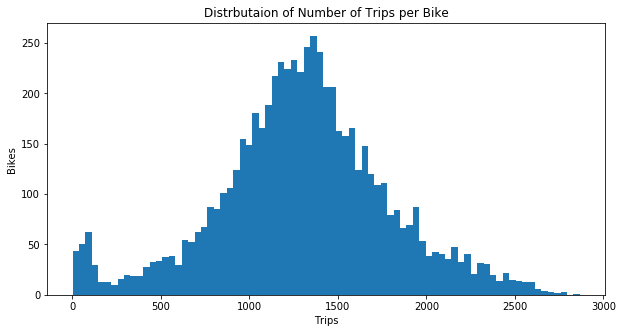

In [70]:
plt.figure(figsize=(10,5))
plt.hist(Bike_data['count'], bins=int(np.sqrt(Bike_data.shape[0])), histtype= 'bar')
plt.title ('Distrbutaion of Number of Trips per Bike')
plt.xlabel('Trips')
plt.ylabel('Bikes')
plt.show()

# Question 3

#### Computing distance between each pair of stations 

In [76]:
import geopy.distance

Stations_Distances= df[['FROM LATITUDE', 'FROM LONGITUDE', 'TO LATITUDE', 'TO LONGITUDE', 'FROM STATION ID', 'TO STATION ID']]\
                .drop_duplicates(['FROM STATION ID', 'TO STATION ID']).dropna()

Stations_Distances['Shortest_Distance']= Stations_Distances.apply(lambda x:\
        geopy.distance.geodesic((x['FROM LATITUDE'], x['FROM LONGITUDE']),(x['TO LATITUDE'], x['TO LONGITUDE'])).km, axis=1)

In [77]:
Stations_Distances.head(5)

,FROM LATITUDE,FROM LONGITUDE,TO LATITUDE,TO LONGITUDE,FROM STATION ID,TO STATION ID,Shortest_Distance
0,41.954245,-87.654406,41.961004,-87.649603,240,245,0.849805
1,41.884576,-87.631890,41.915520,-87.687022,51,116,5.722083
2,41.908537,-87.648627,41.879255,-87.639904,331,192,3.331976
3,41.911722,-87.626804,41.984037,-87.652310,268,459,8.305937
4,41.884603,-87.706304,41.902707,-87.709220,377,510,2.025265


#### Computing bike speed for each trip

In [78]:
df = df.merge(Stations_Distances[['FROM STATION ID', 'TO STATION ID', 'Shortest_Distance']]
              , how='left', on=['FROM STATION ID', 'TO STATION ID'])

In [79]:
df['speed'] = df['Shortest_Distance'] / (df['TRIP DURATION'] / 3600)
print("Average Bike Speed:", df['speed'].mean())

Average Bike Speed: 10.039295693347437


#### Optimizing distances with the help of average speed

In [80]:
df['hour'] = df['TRIP DURATION']/3600
avg_hour = df.groupby(['TO STATION ID', 'FROM STATION ID'])['hour'].mean().reset_index()
avg_speed = df.groupby(['TO STATION ID', 'FROM STATION ID'])['speed'].mean().reset_index()
Stations_Distances = Stations_Distances.merge(avg_hour, how='left',  on=['FROM STATION ID', 'TO STATION ID']) 
Stations_Distances = Stations_Distances.merge(avg_speed, how='left',  on=['FROM STATION ID', 'TO STATION ID'])

In [82]:
Stations_Distances['pred_distance'] = (Stations_Distances['hour'] * Stations_Distances['speed'])*1.3

In [81]:
Stations_Distances.head(3)

,FROM LATITUDE,FROM LONGITUDE,TO LATITUDE,TO LONGITUDE,FROM STATION ID,TO STATION ID,Shortest_Distance,hour,speed
0,41.954245,-87.654406,41.961004,-87.649603,240,245,0.849805,0.096586,9.944195
1,41.884576,-87.631890,41.915520,-87.687022,51,116,5.722083,0.453568,12.812184
2,41.908537,-87.648627,41.879255,-87.639904,331,192,3.331976,0.286757,11.884243


In [85]:
print("More Realistic Average Bike Speed",(Stations_Distances['pred_distance'] / Stations_Distances['hour']).mean())

More Realistic Average Bike Speed 14.174439483156704


In [91]:
df = df.merge(Stations_Distances[['FROM STATION ID', 'TO STATION ID', 'pred_distance']]
              , how='left', on=['FROM STATION ID', 'TO STATION ID'])

In [92]:
df.head(3)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,TO STATION ID,FROM LATITUDE,FROM LONGITUDE,TO LATITUDE,TO LONGITUDE,Age,Shortest_Distance,speed,hour,pred_distance
0,14503132,06/12/2017 05:24:00 PM,06/12/2017 05:30:00 PM,1365,332,240,245,41.954245,-87.654406,41.961004,-87.649603,33.0,0.849805,9.214755,0.092222,1.248607
1,14503133,06/12/2017 05:24:00 PM,06/12/2017 05:54:00 PM,4128,1787,51,116,41.884576,-87.631890,41.915520,-87.687022,48.0,5.722083,11.527419,0.496389,7.554562
2,14503134,06/12/2017 05:24:00 PM,06/12/2017 05:42:00 PM,1885,1049,331,192,41.908537,-87.648627,41.879255,-87.639904,29.0,3.331976,11.434809,0.291389,4.430252


#### Computing Total Traversed Distance for each Bike

In [93]:
gdf = df.groupby('BIKE ID')['pred_distance'].sum().reset_index(name= 'Total Distance')
Bike_data = Bike_data.merge(gdf, on=['BIKE ID'], how='left')

In [94]:
Bike_data.head(3)

,BIKE ID,count,Total Distance
0,1,1295,4201.918622
1,2,947,3102.510852
2,3,1221,3831.366516


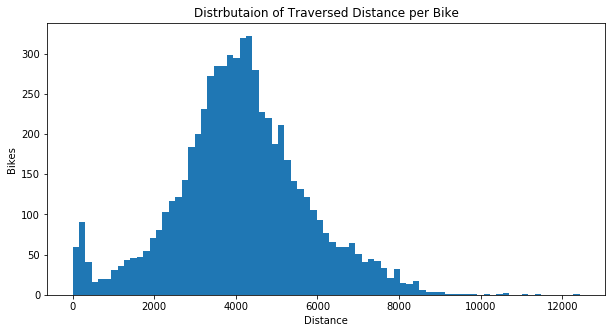

In [95]:
plt.figure(figsize=(10,5))
plt.hist(Bike_data['Total Distance'], bins=int(np.sqrt(Bike_data.shape[0])) ,histtype= 'bar')
plt.title ('Distrbutaion of Traversed Distance per Bike')
plt.xlabel('Distance')
plt.ylabel('Bikes')
plt.show()

In [98]:
Bike_data['Total Distance'].describe()

count     6385.000000
mean      4121.432487
std       1627.998766
min          0.598850
25%       3192.321130
50%       4092.803890
75%       5059.786674
max      12426.183415
Name: Total Distance, dtype: float64

We can see that maximum traversed distance for each bike is approximately 8000 km. Though most bikes

# Question 4

In [110]:
Stations_data = df.groupby(['FROM STATION ID', 'TO STATION ID'])['TRIP ID'].count().reset_index(name='count')
#Stations_data = Stations_data.sort_values(by='count').reset_index()

[]

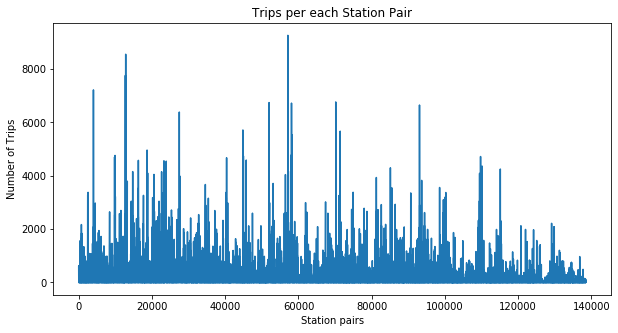

In [111]:
plt.figure(figsize=(10,5))
plt.plot(Stations_data.index, Stations_data['count'])
plt.title ('Trips per each Station Pair')
plt.xlabel('Station pairs')
plt.ylabel('Number of Trips')
plt.plot()

In [112]:
Stations_data.agg( {"count" : ["min", "max", "mean", "median", "std", "skew"]})

,count
min,1.000000
max,9258.000000
mean,60.026600
median,8.000000
std,191.831508
skew,12.276847


### Top Pairs of Stations with the Most Number of Trips

In [113]:
Top = Stations_data[Stations_data['count']>1000].sort_values(by='count', ascending=False)
Top

,FROM STATION ID,TO STATION ID,count
57105,192,43,9258
12836,43,192,8550
12744,43,91,7757
4027,18,43,7214
70180,237,148,6763
...,...,...,...
57241,192,196,1003
16588,53,77,1003
15408,50,43,1002
5162,21,192,1001


#### Heatmap of Number of Trips for Station Pairs

In [114]:
Stations_data['rate'] = pd.cut(Stations_data['count'], bins=[0,5,10,20,30,40,500,1000, 2500, 5000, 10000, 20000, 30000 ],
                               labels = range(12))

hm_df = Stations_data.drop('count', axis=1).set_index(['FROM STATION ID', 'TO STATION ID']).unstack().dropna(thresh=300)
idx = list(hm_df.index.intersection(hm_df.columns.get_level_values(1)))
hm_df = hm_df['rate']
hm_df = hm_df[idx].fillna(0).astype(int)

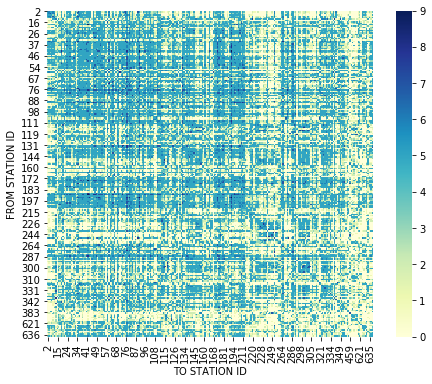

In [115]:
plt.subplots(figsize=(8,6))
ax = sns.heatmap(hm_df.fillna(0), cmap="YlGnBu", square=True)

### Top Stations Map

In [117]:
city='Chicago'
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
location = [location.latitude, location.longitude]
print("Chicago [lat, long]:", location)

Chicago [lat, long]: [41.8755616, -87.6244212]


In [118]:
Stations_info = df.drop_duplicates(['FROM STATION ID'])[['FROM STATION ID', 'FROM LATITUDE', 'FROM LONGITUDE']]
Stations_count = df.groupby('FROM STATION ID')['TRIP ID'].count().reset_index().rename(columns = {'TRIP ID': 'count'})
Stations_info = Stations_info.merge(Stations_count, how='left', on=['FROM STATION ID'])
Stations_info.rename(columns={'FROM STATION ID': 'STATION ID', 'FROM LATITUDE':'LATITUDE' , 'FROM LONGITUDE':'LONGITUDE'}, inplace = True)

In [123]:
Stations_info['count'].describe()

count       625.000000
mean      13301.510400
std       17449.922569
min           5.000000
25%        1267.000000
50%        6696.000000
75%       19778.000000
max      147129.000000
Name: count, dtype: float64

In [125]:
Stations_info['Category'] = pd.cut(Stations_info['count'], bins=[0,1500,7500,20000, 10000000 ])

#### Plotting on Map

In [126]:
from matplotlib.colors import rgb2hex

x, y = "LATITUDE", "LONGITUDE"
color = "Category"
popup = "STATION ID"
data = Stations_info.copy()

## create color column
lst_colors=["lightblue","blue", "darkblue", "purple"]
lst_elements = sorted(list(Stations_info[color].unique()))
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data['count'].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999;
font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_

# Question 5

Making a new dataframe for clustring. Columns of this dataframe represent bikes and each row represent a station. each cell shows if a bike has traveled to the corresponding station.

In [131]:
Incoming = df.groupby(['TO STATION ID'])['BIKE ID'].unique().reset_index()\
.rename(columns={'TO STATION ID': 'STATION ID'})
Outgoing = df.groupby(['FROM STATION ID'])['BIKE ID'].unique().reset_index()\
.rename(columns={'FROM STATION ID': 'STATION ID'})
stations_bike_df = Incoming.merge(Outgoing, on= ['STATION ID'], how='inner')

In [132]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
s1=pd.DataFrame(mlb.fit_transform(stations_bike_df['BIKE ID_x']),
                columns=mlb.classes_, index=stations_bike_df.index).astype(bool)
s2= pd.DataFrame(mlb.fit_transform(stations_bike_df['BIKE ID_y']),
                 columns=mlb.classes_, index=stations_bike_df.index).astype(bool)
stations_bike_df= s1|s2

In [133]:
stations_bike_df.head(3)

,1,2,3,4,5,6,7,8,9,10,...,6908,6909,6910,6912,6913,6929,6931,6941,6942,6946
0,True,True,True,True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,False,False,False
2,True,True,True,True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,False,True,True,...,False,False,False,True,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
Stations_info =Stations_info.drop(['count', 'cat'], axis=1) 

## Affinity Propagation Clustering Approach

In [137]:
X = stations_bike_df
AffPro = cluster.AffinityPropagation(random_state=42).fit(X)
Stations_info['cluster'] = AffPro.labels_

#### Plotting Clusters on map

Text(0.5, 1.0, 'Affinity Propagation Clustering (k=12)')

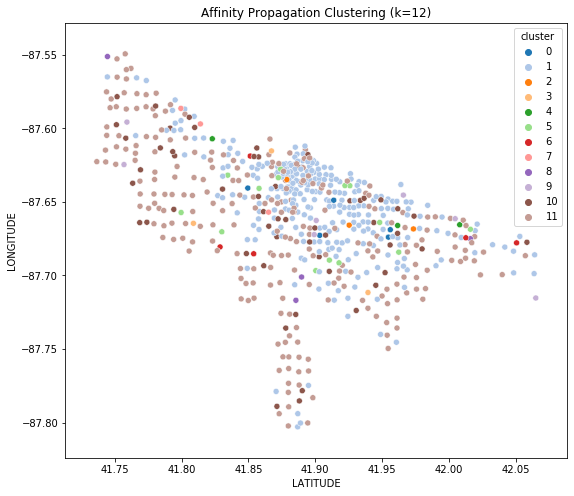

In [138]:
k = Stations_info["cluster"].nunique()

plt.figure(figsize=(9,8))
sns.scatterplot(x="LATITUDE", y="LONGITUDE", data=Stations_info, 
                palette=sns.color_palette("tab20",k),
                hue='cluster', size_order=[1,0],
                legend="brief").set_title('Affinity Propagation Clustering (k='+str(k)+')')

## Kmeans Clustering Approach

#### Finding optimal number of clusters with elbow method

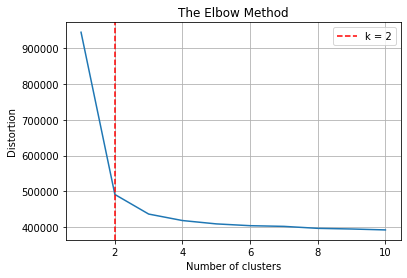

In [145]:
X = stations_bike_df
max_k = 10
## iterations
distortions = [] 

for i in range(1, max_k+1):
    if len(X) >= i:
       k_means = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       k_means.fit(X)
       distortions.append(k_means.inertia_)
    
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

k=2
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

#### Implementing kmeans for k=2 

Text(0.5, 1.0, 'Kmeans Clustering (k=2)')

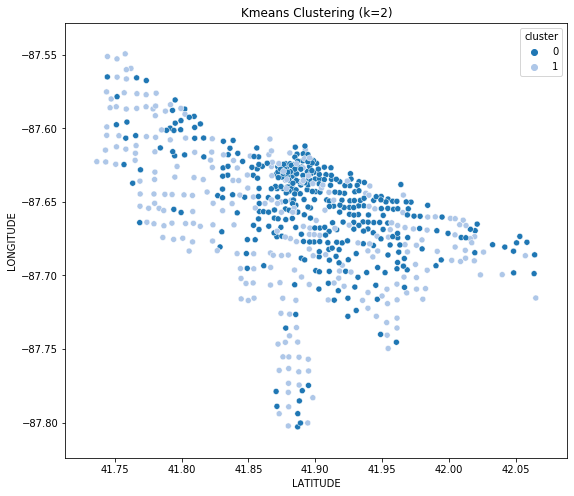

In [144]:
k = 2
k_means = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
k_means.fit(X)
Stations_info['cluster'] = k_means.labels_
centeroids = k_means.cluster_centers_

plt.figure(figsize=(9,8))
sns.scatterplot(x="LATITUDE", y="LONGITUDE", data=Stations_info, 
                palette=sns.color_palette("tab20",k),
                hue='cluster', size_order=[1,0],
                legend="brief").set_title('Kmeans Clustering (k='+str(k)+')')


In [146]:
x, y = "LATITUDE", "LONGITUDE"
color = "cluster"
marker = "centroids"
data = Stations_info.copy()
## create color column
lst_elements = sorted(list(Stations_info[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999;
font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_

# Question 6

### Check if records for each bike is continuous

In [8]:
df = df.sort_values(by=['START TIME']).reset_index()

In [10]:
def check_continuous(group):
    ret= True
    #print(group['TO STATION ID'] == group['FROM STATION ID'].shift(1).sum())
    if((group['TO STATION ID'] != group['FROM STATION ID'].shift(1)).sum() >1 ):
        ret= False
    return ret

x = df.groupby('BIKE ID').apply(lambda g: check_continuous(g)).reset_index()

In [11]:
x[0].value_counts()

False    6379
True        7
Name: 0, dtype: int64

In [13]:
df[df['BIKE ID']==1]

,index,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,TO STATION ID,FROM LATITUDE,FROM LONGITUDE,TO LATITUDE,TO LONGITUDE
487549,3347288,15067278,2017-07-10 19:05:00,2017-07-10 19:12:00,1,423,90,45,41.881032,-87.624084,41.876243,-87.624426
487666,3345118,15067436,2017-07-10 19:12:00,2017-07-10 19:14:00,1,99,45,45,41.876243,-87.624426,41.876243,-87.624426
488011,3356804,15067831,2017-07-10 19:31:00,2017-07-10 19:35:00,1,248,45,168,41.876243,-87.624426,41.864059,-87.623727
489319,3352380,15069413,2017-07-10 21:14:00,2017-07-10 21:21:00,1,425,168,62,41.864059,-87.623727,41.851375,-87.618835
511550,3273560,15096046,2017-07-12 12:46:00,2017-07-12 12:54:00,1,486,237,237,41.842052,-87.617000,41.842052,-87.617000
...,...,...,...,...,...,...,...,...,...,...,...,...
9530901,4364522,25469099,2019-10-18 11:40:08,2019-10-18 12:31:09,1,3061,567,594,41.768938,-87.652934,41.805661,-87.683392
9547933,4372581,25486824,2019-10-19 14:59:59,2019-10-19 15:03:28,1,208,594,551,41.805661,-87.683392,41.808227,-87.677180
9983078,4807159,25946090,2019-12-27 05:36:07,2019-12-27 06:02:59,1,1611,366,280,41.841633,-87.657435,41.837800,-87.651140
9989404,4814279,25952695,2019-12-28 19:03:09,2019-12-28 19:14:22,1,672,317,134,41.869154,-87.671045,41.877642,-87.649618


### Invalid Trip Durations

Checking if trip duration is valid comparing to start time and stop time diff

In [14]:
df['Actual Duration'] = (df['STOP TIME'] - df['START TIME']).dt.total_seconds()

Invalid Trips with respect to trip duration:

In [19]:
df[abs(df['Actual Duration'] - df['TRIP DURATION'])> 1800]

,index,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,TO STATION ID,FROM LATITUDE,FROM LONGITUDE,TO LATITUDE,TO LONGITUDE,Actual Duration
2289382,3785569,17185277,2017-11-04 16:56:00,2017-11-05 09:53:00,64,64572,225,226,41.919936,-87.648830,41.939743,-87.658865,61020.0
2290514,3784548,17186666,2017-11-05 01:24:00,2017-11-05 01:04:00,6260,2385,144,76,41.921822,-87.644140,41.880958,-87.616743,-1200.0
2290526,3785071,17186673,2017-11-05 01:29:00,2017-11-05 01:05:00,457,2158,144,76,41.921822,-87.644140,41.880958,-87.616743,-1440.0
2290558,3784892,17186684,2017-11-05 01:45:00,2017-11-05 05:47:00,606,18091,176,199,41.902973,-87.631280,41.891466,-87.626761,14520.0
2290560,3785301,17186686,2017-11-05 01:47:00,2017-11-05 01:04:00,6405,1028,210,274,41.903450,-87.667747,41.861267,-87.656625,-2580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679648,4546594,25625846,2019-11-03 01:53:10,2019-11-03 01:04:53,5877,703,177,327,41.926277,-87.630834,41.921540,-87.653818,-2897.0
9679649,4551160,25625847,2019-11-03 01:53:24,2019-11-03 01:06:08,3984,764,484,484,41.954005,-87.719128,41.954005,-87.719128,-2836.0
9679652,4561701,25625849,2019-11-03 01:55:33,2019-11-03 01:01:52,5059,379,109,320,41.874754,-87.649807,41.872187,-87.661501,-3221.0
9679655,4550208,25625850,2019-11-03 01:57:48,2019-11-03 01:01:26,5310,217,340,300,41.929546,-87.643118,41.937725,-87.644095,-3382.0


In [16]:
print("number of trips with stop time < start time!:", df[df['Actual Duration']<0].shape[0])

number of trips with stop time < start time!: 31


### Dropping Invalid Data

In [24]:
idx1 = df[abs(df['Actual Duration'] - df['TRIP DURATION'])> 1800].index
df.drop(idx1)
idx2 = df[df['Actual Duration']<0].index
df.drop(idx2)
df.shape[0]

9999133

### Plotting Distribution for Numerical Features

In [25]:
orginal_df['Age'] = 2020 - orginal_df['BIRTH YEAR']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a6285c3c8>,
      dtype=object)

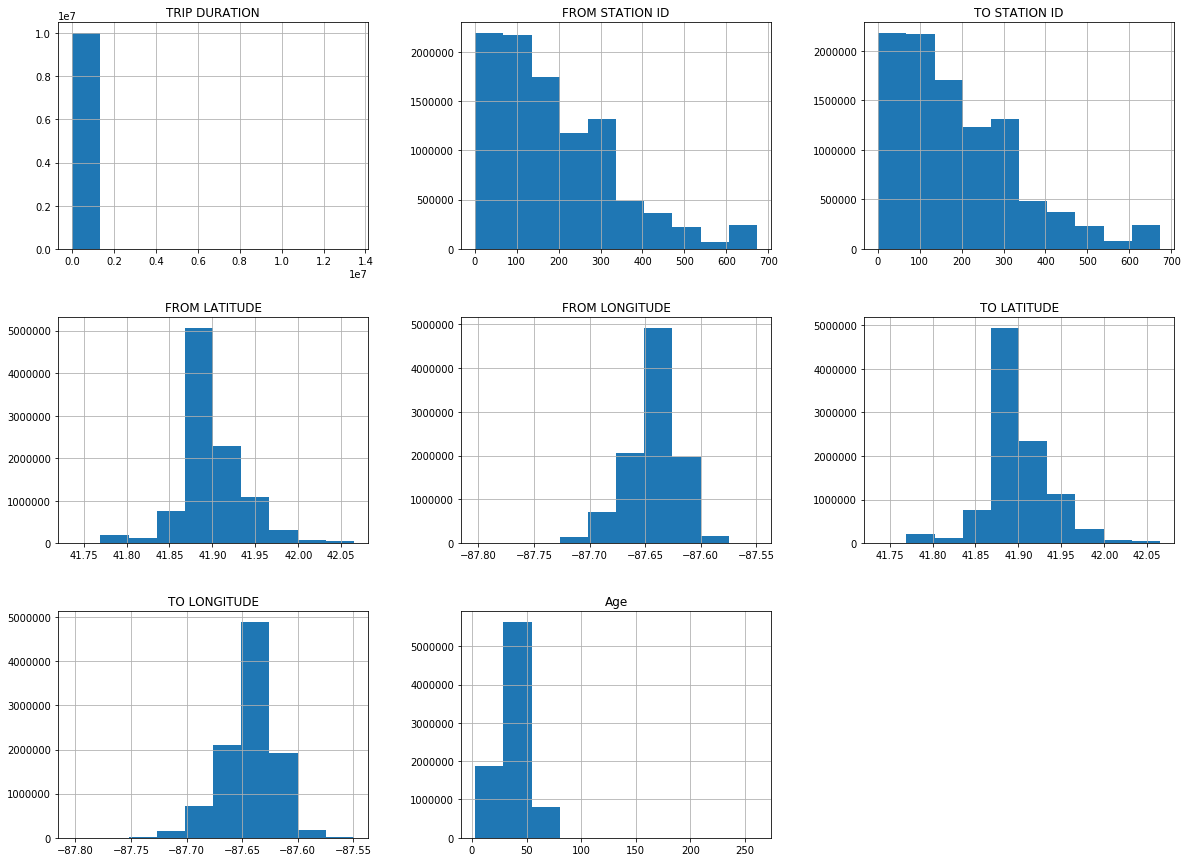

In [26]:
orginal_df.drop(['TRIP ID', 'BIKE ID', 'BIRTH YEAR'], axis=1).hist(figsize=(20,15))

we can see that some trips have very long duration. other features seem normal. 

### Checking if langitude and latitude is unique for each station

In [27]:
gdf = df.groupby('FROM STATION ID')[['FROM LATITUDE', 'FROM LONGITUDE']].nunique().reset_index()
gdf[(gdf['FROM LATITUDE']>1) | (gdf['FROM LONGITUDE']>1)]

,FROM STATION ID,FROM LATITUDE,FROM LONGITUDE
0,2,8,8
4,6,3,3
13,17,2,2
14,18,2,2
15,19,2,2
...,...,...,...
540,581,2,2
544,585,2,2
561,602,2,2
578,619,3,3


In [28]:
df[df['FROM STATION ID']==2]['FROM LATITUDE'].value_counts()

41.876393    7981
41.876470    7686
41.881060    6126
41.876511    5984
41.874239    1454
41.876406    1379
41.869430     266
41.872638     110
Name: FROM LATITUDE, dtype: int64

we can see that the location info for 89 stations is not valid. 